In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
corona_dataset_csv = pd.read_csv("covid19_Confirmed_dataset.csv")

In [3]:
corona_dataset_csv.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [4]:
corona_dataset_csv.shape

(266, 104)

# Delete Unnecessary Columns

In [5]:
corona_dataset_csv.drop(["Lat", "Long"], axis = 1, inplace = True)

In [6]:
corona_dataset_csv.head(10)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,0,0,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,0,0,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


In [7]:
corona_dataset_csv["Province/State"].isna().sum()

184

<AxesSubplot:>

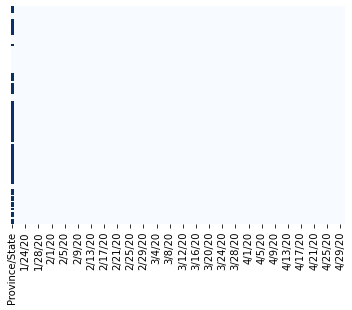

In [8]:
sns.heatmap(corona_dataset_csv.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [9]:
# Aggregate the rows by the country

In [10]:
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [11]:
corona_dataset_aggregated.shape

(187, 100)

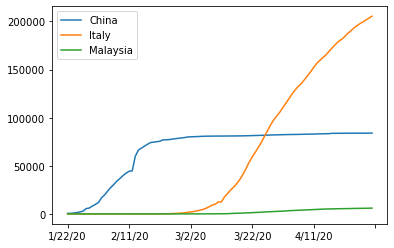

In [12]:
corona_dataset_aggregated.loc["China"].plot()
corona_dataset_aggregated.loc["Italy"].plot()
corona_dataset_aggregated.loc["Malaysia"].plot()
plt.legend()

In [13]:
# Task 3: Calculating a good measure

<AxesSubplot:>

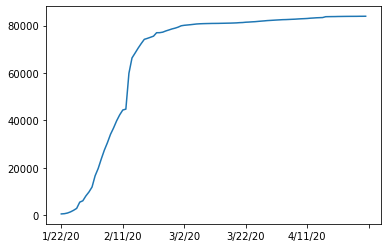

In [14]:
corona_dataset_aggregated.loc["China"].plot()

<AxesSubplot:>

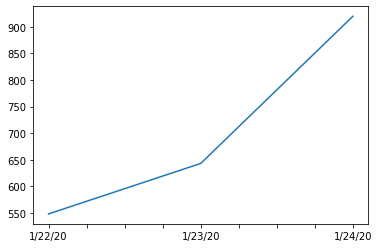

In [15]:
corona_dataset_aggregated.loc["China"][:3].plot()

<AxesSubplot:>

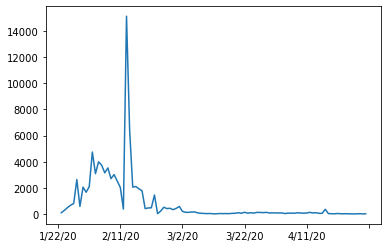

In [16]:
# Calculating and plotting the first derivative of the curve
corona_dataset_aggregated.loc["China"].diff().plot()

In [17]:
# Find maximum infection rate for China, Italy and Spain

In [18]:
corona_dataset_aggregated.loc["China"].diff().max()

15136.0

In [19]:
corona_dataset_aggregated.loc["Italy"].diff().max()

6557.0

In [20]:
corona_dataset_aggregated.loc["Spain"].diff().max()

9630.0

In [21]:
# Find maximum infection rate for all of the countries

In [22]:
countries = list(corona_dataset_aggregated.index)

In [23]:
max_infection_rate = []
for c in countries:
    max_infection_rate.append(corona_dataset_aggregated.loc[c].diff().max())
corona_dataset_aggregated["max_infection_rate"] = max_infection_rate

In [24]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


In [25]:
# Create a new dataframe with only needed column

In [26]:
corona_data = pd.DataFrame(corona_dataset_aggregated["max_infection_rate"])

In [27]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


# Importing new dataset

In [28]:
happiness_report_csv = pd.read_csv("1. Data/Covid Data/worldwide_happiness_report.csv")

In [29]:
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [30]:
# Drop Unnecessary Columns

In [31]:
drop_columns = ["Overall rank", "Score", "Generosity", "Freedom to make life choices"]

In [32]:
happiness_report_csv.drop(drop_columns, axis = 1, inplace = True)

In [33]:
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Perceptions of corruption
0,Finland,1.340,1.587,0.986,0.393
1,Denmark,1.383,1.573,0.996,0.410
2,Norway,1.488,1.582,1.028,0.341
3,Iceland,1.380,1.624,1.026,0.118
4,Netherlands,1.396,1.522,0.999,0.298


In [34]:
# Changing the indices of the dataframe

In [35]:
happiness_report_csv.set_index("Country or region", inplace = True)

In [36]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Perceptions of corruption
Country or region,,,,
Finland,1.340,1.587,0.986,0.393
Denmark,1.383,1.573,0.996,0.410
Norway,1.488,1.582,1.028,0.341
Iceland,1.380,1.624,1.026,0.118
Netherlands,1.396,1.522,0.999,0.298


In [37]:
# Join corona data and happiness report dataset

In [38]:
corona_data.shape

(187, 1)

In [39]:
happiness_report_csv.shape

(156, 4)

In [40]:
data = corona_data.join(happiness_report_csv, how = "inner")

In [41]:
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Perceptions of corruption
Afghanistan,232.0,0.350,0.517,0.361,0.025
Albania,34.0,0.947,0.848,0.874,0.027
Algeria,199.0,1.002,1.160,0.785,0.114
Argentina,291.0,1.092,1.432,0.881,0.050
Armenia,134.0,0.850,1.055,0.815,0.064


In [42]:
# Correlation matrix

In [43]:
data.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Perceptions of corruption
max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.097703
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.311577
Social support,0.191958,0.759468,1.000000,0.765286,0.203225
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.314811
Perceptions of corruption,0.097703,0.311577,0.203225,0.314811,1.000000


<AxesSubplot:>

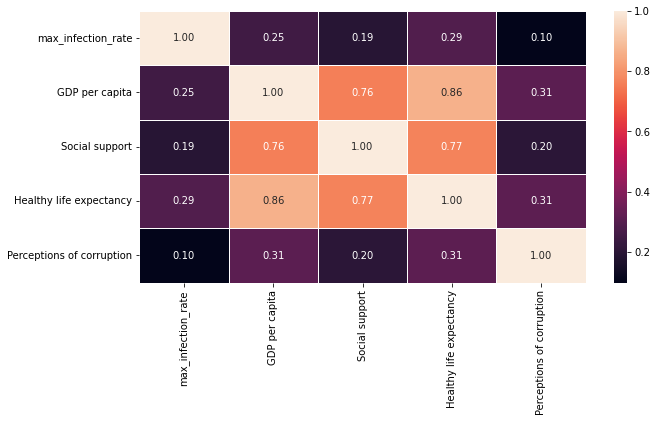

In [44]:
fig, ax  = plt.subplots(figsize = (10,5))
sns.heatmap(data.corr(), annot = True, linewidth=0.5, fmt='.2f', ax=ax)

In [45]:
# Visualization of the results

In [46]:
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Perceptions of corruption
Afghanistan,232.0,0.350,0.517,0.361,0.025
Albania,34.0,0.947,0.848,0.874,0.027
Algeria,199.0,1.002,1.160,0.785,0.114
Argentina,291.0,1.092,1.432,0.881,0.050
Armenia,134.0,0.850,1.055,0.815,0.064


In [47]:
# Plotting GDP vs maximum_infection_rate

<AxesSubplot:xlabel='GDP per capita', ylabel='max_infection_rate'>

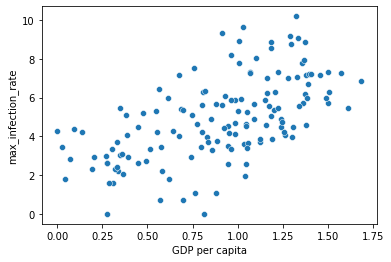

In [48]:
x = data["GDP per capita"]
y = data["max_infection_rate"]
sns.scatterplot(x,np.log(y))

<AxesSubplot:xlabel='GDP per capita', ylabel='max_infection_rate'>

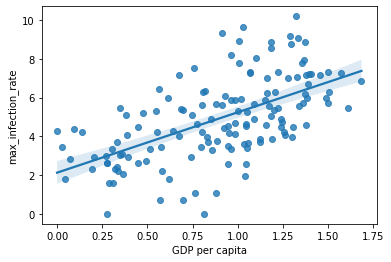

In [49]:
sns.regplot(x, np.log(y))

In [50]:
# People living in developed countries are more proned to covid19 infection